In [173]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [174]:
bos.columns =['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX' ,'RM' ,'AGE' ,'DIS' ,'RAD' ,'TAX' ,'PTRATIO','B','LSTAT']

In [175]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [176]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [177]:
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [178]:
boston["PRICE"] = boston.target

In [179]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [180]:
bos.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
dtype: bool

In [181]:
bos.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [182]:
boston["PRICE"] = boston.target

In [183]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [184]:
X = boston["PRICE"] # dependent value

In [185]:
X = pd.Series(X)
X

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Length: 506, dtype: float64

In [186]:
y = bos
data = pd.concat((X,y), axis = 1)

In [187]:
data.columns = ['PRICE','CRIM', 'ZN', 'INDUS','CHAS' ,'NOX' ,'RM', 'AGE', 'DIS', 'RAD' ,'TAX' ,'PTRATIO', 'B' ,'LSTAT']

<AxesSubplot:>

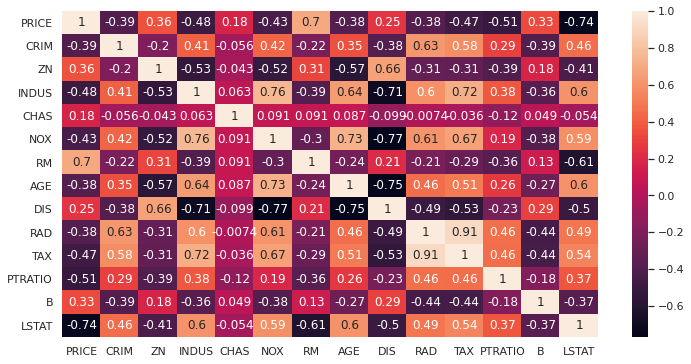

In [188]:
plt.figure(figsize=(12,6))
corr_val=data.corr()
sns.heatmap(data=corr_val,annot=True)

In [189]:
data = data[['LSTAT','PRICE','PTRATIO','RM']]

<AxesSubplot:>

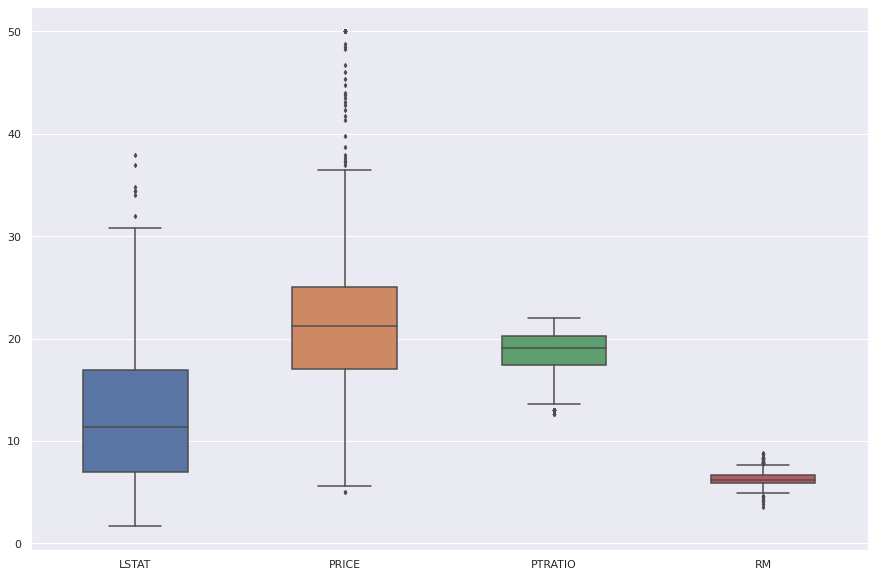

In [190]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

In [191]:
q = data['PRICE'].quantile(0.98)
# we are removing the top 2% data from the Pregnancies column
data_cleaned = data[data['PRICE']<q]
q = data_cleaned['PRICE'].quantile(0.99)
# we are removing the top 2% data from the Pregnancies column
data_cleaned = data_cleaned[data_cleaned['LSTAT']<q]
q = data_cleaned['PRICE'].quantile(0.98)
# we are removing the top 2% data from the Pregnancies column
data_cleaned = data_cleaned[data_cleaned['RM']<q]

/home/solomon/miniconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/solomon/miniconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/solomon/miniconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot`

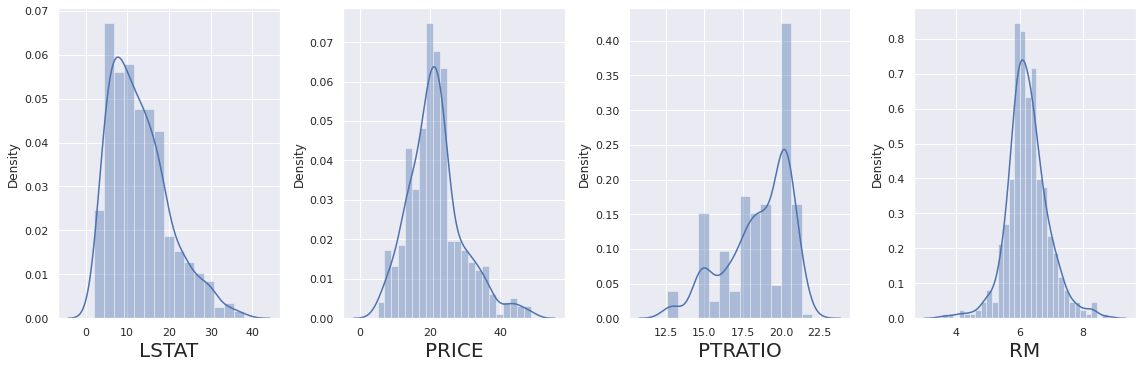

In [192]:
# let's see how data is distributed for every column

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_cleaned :
    if plotnumber<=16 :
        ax = plt.subplot(5,5,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [193]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [194]:
y = data_cleaned['PRICE'].astype(int)
X = data_cleaned[['RM','LSTAT','PTRATIO']]

In [195]:
X

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7
...,...,...,...
501,6.593,9.67,21.0
502,6.120,9.08,21.0
503,6.976,5.64,21.0
504,6.794,6.48,21.0


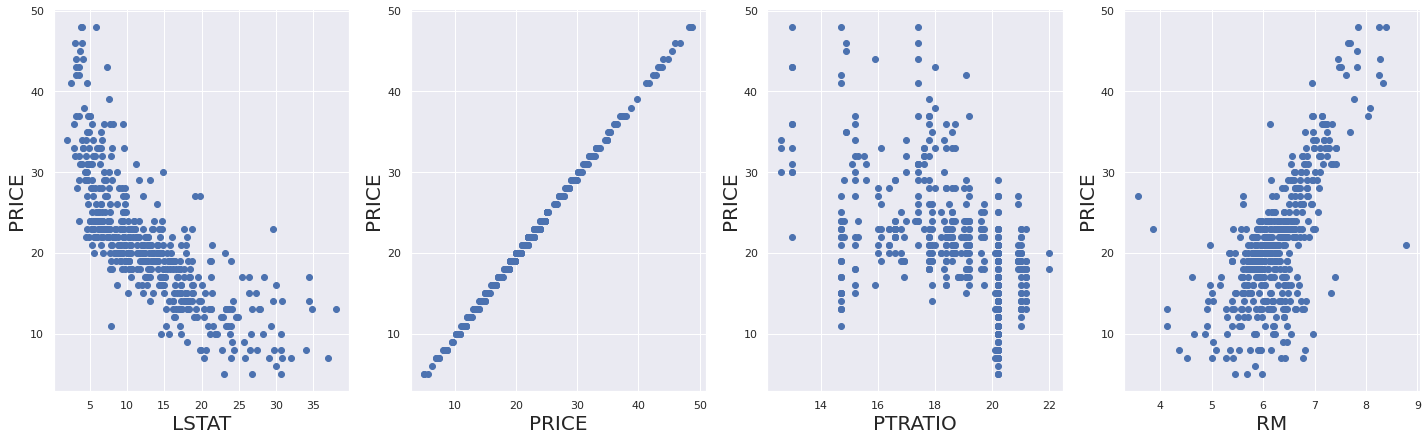

In [196]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in data_cleaned :
    if plotnumber<=15 :
        ax = plt.subplot(5,4,plotnumber)
        plt.scatter(data_cleaned [column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('PRICE',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [197]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

scaler =StandardScaler()
X_scaled = scaler.fit_transform(X)

variables = X_scaled 

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

In [198]:
vif

,VIF,Features
0,1.610211,RM
1,1.688073,LSTAT
2,1.158871,PTRATIO


In [199]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490 entries, 0 to 505
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       490 non-null    float64
 1   LSTAT    490 non-null    float64
 2   PTRATIO  490 non-null    float64
dtypes: float64(3)
memory usage: 15.3 KB


In [200]:
# Splitting to training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.3, random_state = 4)

In [201]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(random_state=6)
reg.fit(X_train, y_train)

/home/solomon/miniconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=6, verbose=0, warm_start=False)

In [202]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [203]:
reg.score(X_test,y_test)

0.8763777644949193

In [204]:
# Model Evaluation
import sklearn.metrics as metrics
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9615216538573859
Adjusted R^2: 0.9611811375198406
MAE: 1.060058309037901
MSE: 2.2712536443148688
RMSE: 1.5070678963851858


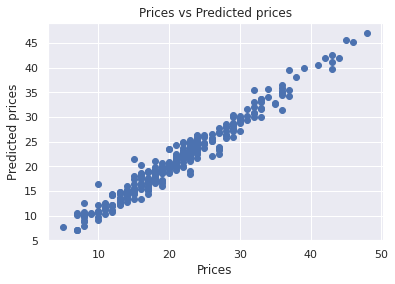

In [205]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

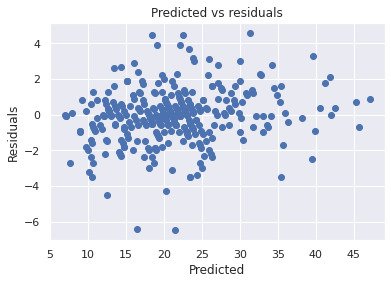

In [206]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

For test data

In [207]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [208]:
# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8763777644949193
Adjusted R^2: 0.8737842910227848
MAE: 2.2734693877551018
MSE: 8.441632653061225
RMSE: 2.905448786859136


In [209]:
grid_param = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['mae','mse'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}

In [210]:
from sklearn.model_selection import train_test_split,GridSearchCV
grid_search = GridSearchCV(estimator=reg,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)

In [211]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 20736 candidates, totalling 103680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 3864 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 4600 tasks      | elapsed: 19.9min
[Parallel(n_jobs=-1)]: Done 5400 tasks      | elapsed: 23.1min
[Parallel(n_jobs=-1)]: Done 6264 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | e

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=6, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [90, 100, 115, 130], 'criterion': ['mae', 'mse'], 'max_depth': range(2, 20), 'min_samples_leaf': range(1, 10), 'min_samples_split': range(2, 10), 'max_features': ['auto', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [212]:
grid_search.best_params_

{'criterion': 'mse',
 'max_depth': 6,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 100}

In [232]:
rand_clf = RandomForestRegressor(criterion= 'mse',
 max_depth = 6,
 max_features = 'log2',
 min_samples_leaf = 1,
 min_samples_split= 3,
 n_estimators = 100)

In [233]:
rand_clf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [234]:
rand_clf.score(X_test,y_test)

0.8737295338967939